In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
#load dataset

df = pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')

In [3]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')



In [4]:
#info about dataset

df.info()
df.describe()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#summary statistics

# Basic statistics
mean_values = df.mean()
median_values = df.median()
std_values = df.std()

# Value distributions
value_distributions = df.describe()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)
print("\nValue Distributions:\n", value_distributions)

Mean Values:
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

Median Values:
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Standard Deviation:
 age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

Value Distributions

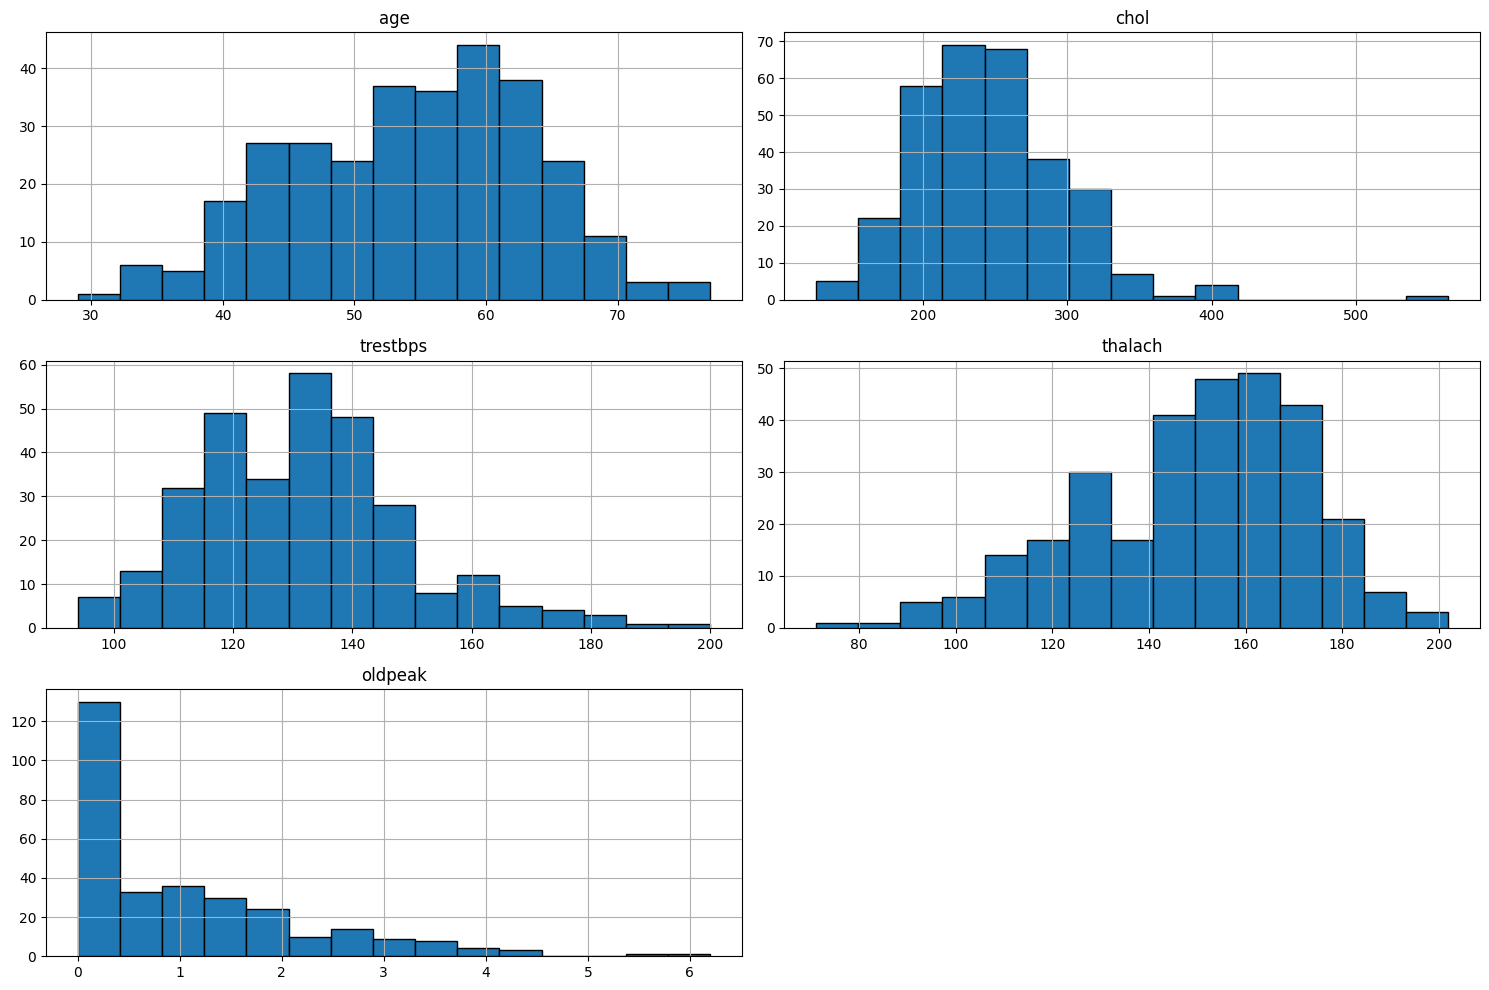

In [6]:
# List of numerical features to plot
numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Plot histograms
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2), edgecolor='black')
plt.tight_layout()
plt.show()

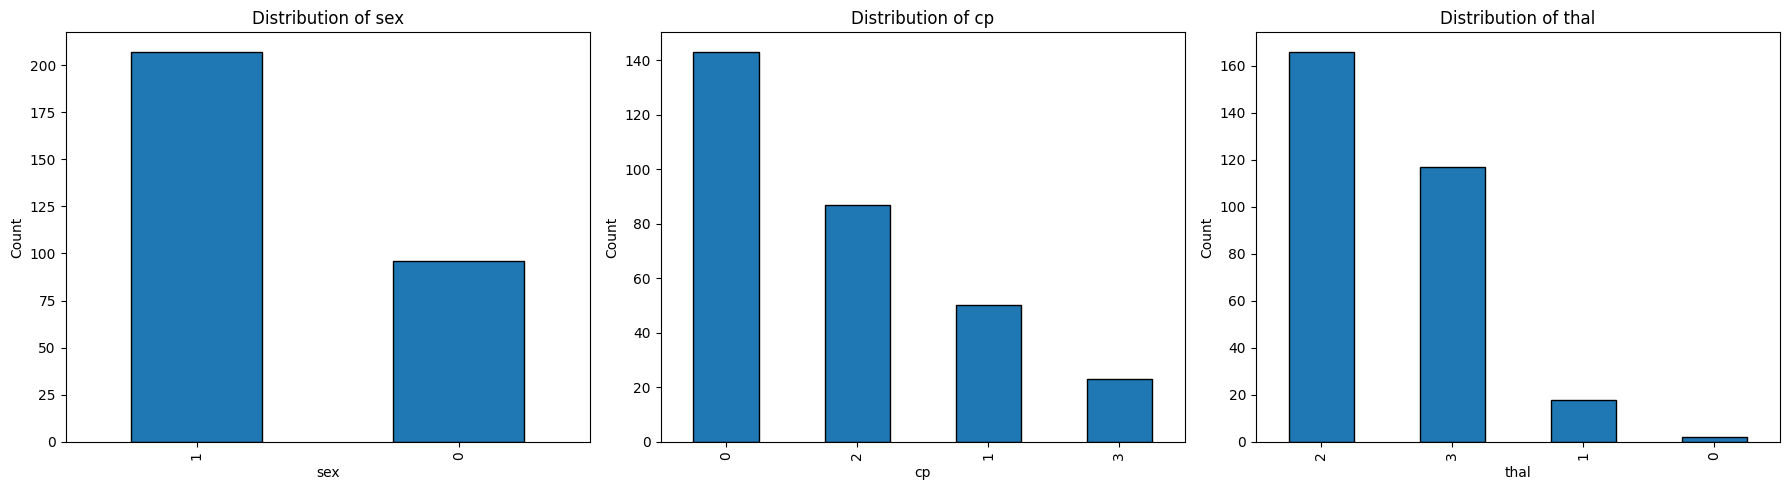

In [7]:
# List of categorical features to plot
categorical_features = ['sex', 'cp', 'thal']

# Plot bar plots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


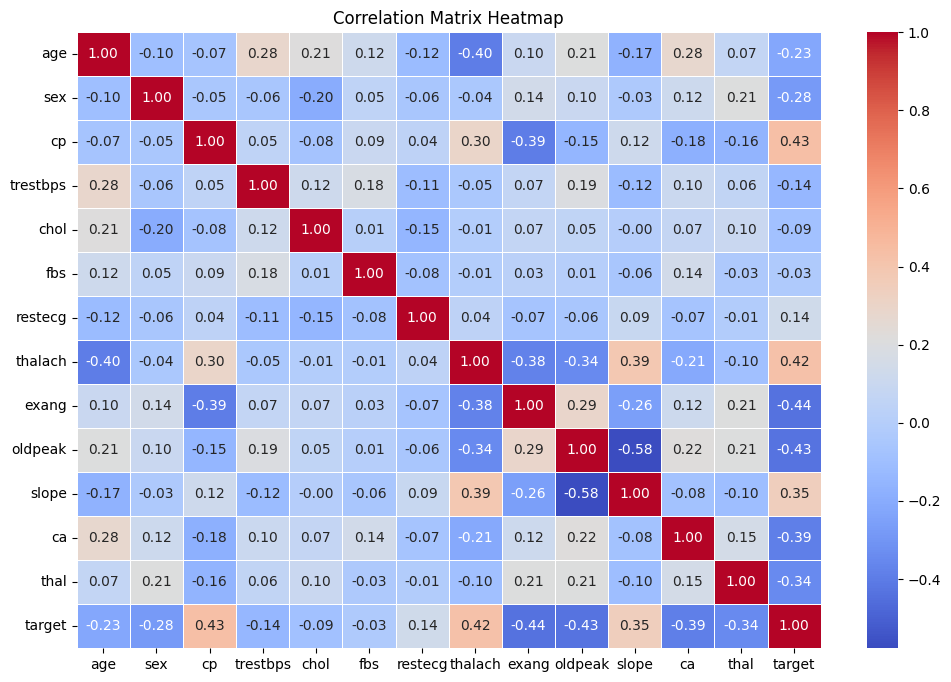

In [8]:
%pip install seaborn

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [20]:
# Define a function to filter outliers using IQR
def filter_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical features to filter outliers
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Filter outliers
df_filtered = filter_outliers(df, numerical_features)

# Display the filtered dataframe
print(df_filtered.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  285.000000  285.000000  285.000000  285.000000  285.000000  285.000000   
mean    54.017544    0.701754    0.985965  129.919298  242.231579    0.140351   
std      9.006045    0.458293    1.031107   15.261470   44.278358    0.347962   
min     35.000000    0.000000    0.000000  100.000000  149.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  210.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.000000    0.000000   
max     71.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  285.000000  285.000000  285.000000  285.000000  285.000000  285.000000   
mean     0.526316  149.848982    0.315789    0.948772    1.428070    0.705263   
std      0.514072   22.6911

In [10]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with mode
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Verify if there are any missing values left
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


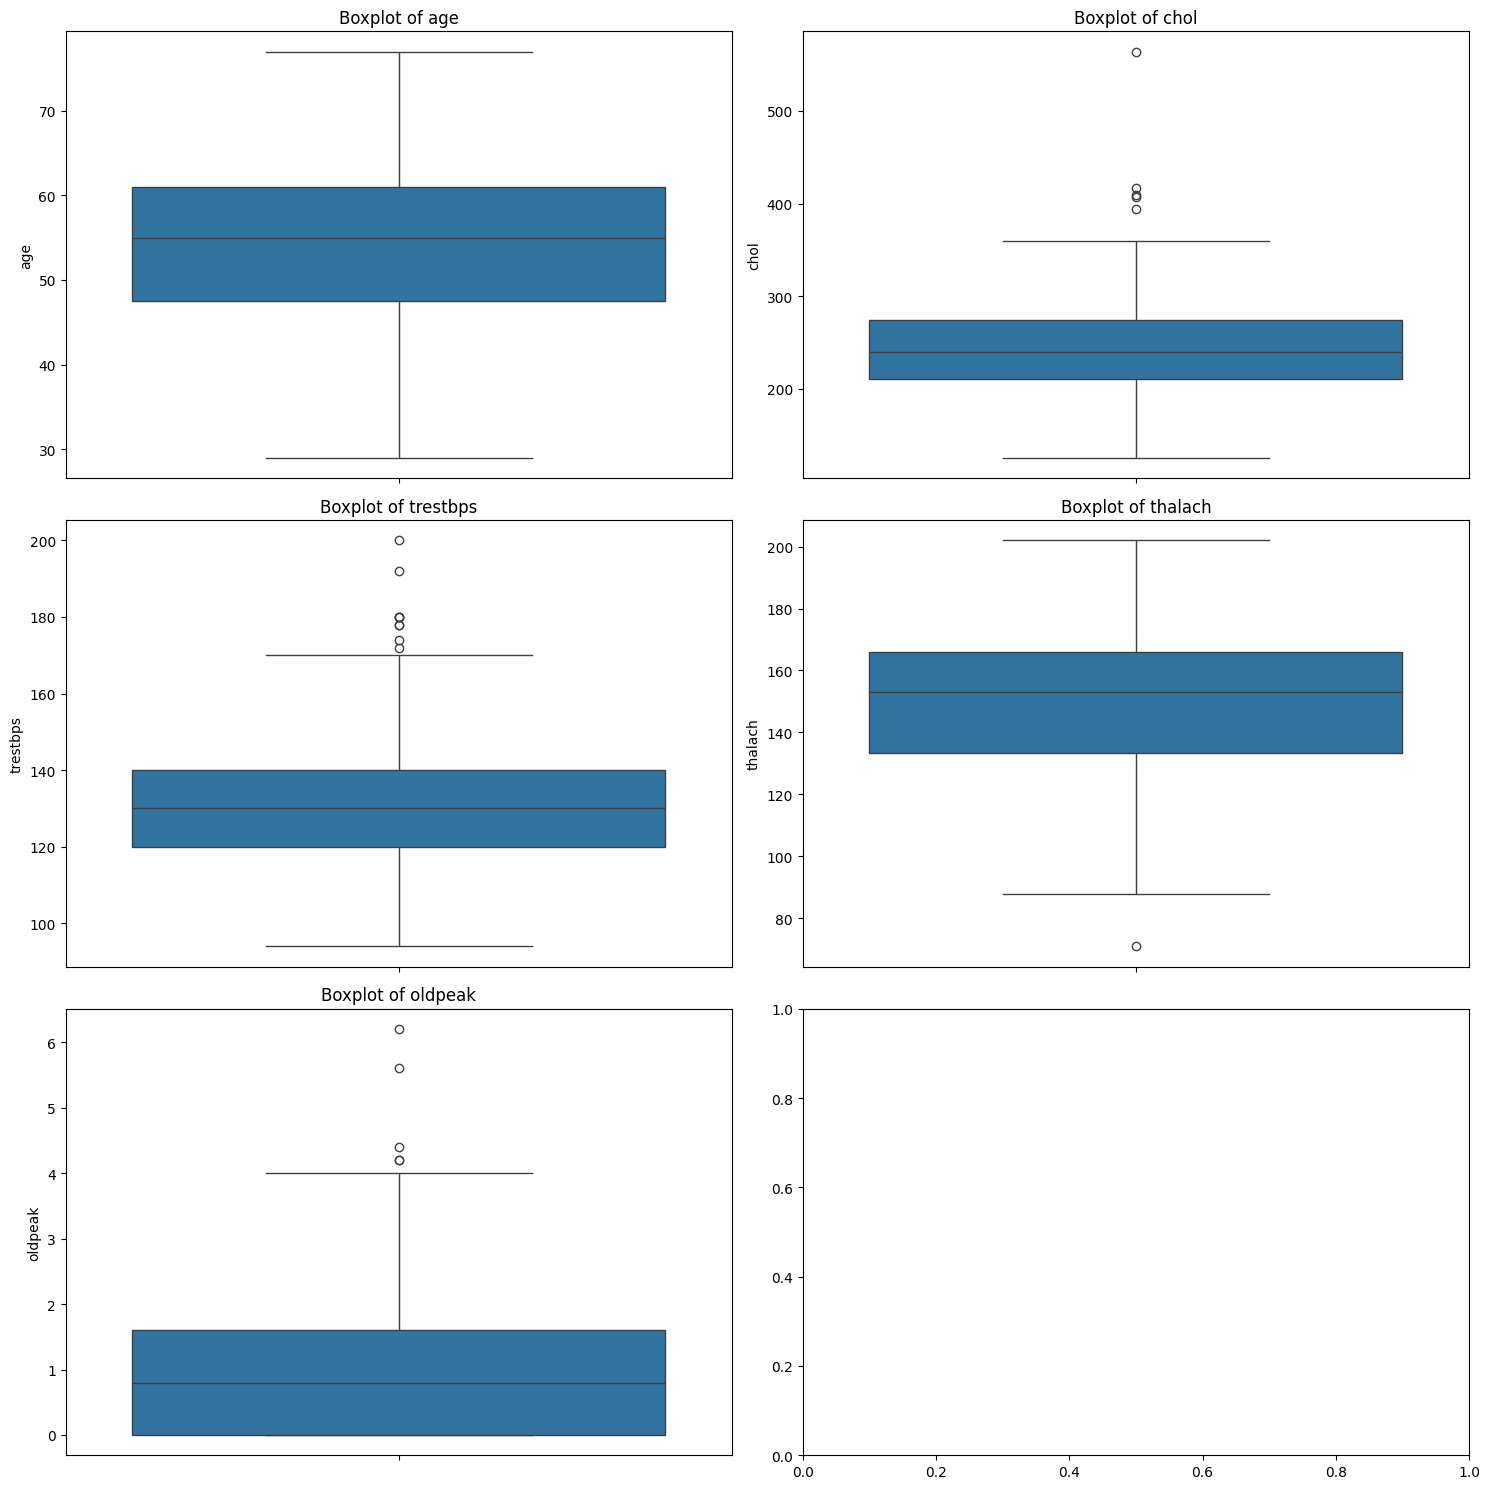

              age        chol    trestbps     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.346535  245.864554  131.557756  149.715908    1.027723
std      8.919547   48.874343   17.110736   22.467881    1.119258
min     35.000000  149.000000  100.000000   95.020000    0.000000
25%     47.500000  211.000000  120.000000  133.500000    0.000000
50%     55.000000  240.000000  130.000000  153.000000    0.800000
75%     61.000000  274.500000  140.000000  166.000000    1.600000
max     71.000000  406.740000  180.000000  191.960000    4.200000


In [11]:
# Plot boxplots for numerical features to identify outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Handle outliers by capping them at the 1st and 99th percentiles
for feature in numerical_features:
    lower_bound = df[feature].quantile(0.01)
    upper_bound = df[feature].quantile(0.99)
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

# Verify the changes
print(df[numerical_features].describe())

In [12]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv', index=False)

In [14]:
#logistic reggression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')



Accuracy: 0.87
Precision: 0.88
Recall: 0.88
F1-score: 0.88


In [15]:
from sklearn.tree import DecisionTreeClassifier

#decision tree

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f'Accuracy (DT): {accuracy_dt:.2f}')
print(f'Precision (DT): {precision_dt:.2f}')
print(f'Recall (DT): {recall_dt:.2f}')
print(f'F1-score (DT): {f1_dt:.2f}')

Accuracy (DT): 0.75
Precision (DT): 0.84
Recall (DT): 0.66
F1-score (DT): 0.74


In [16]:
from sklearn.ensemble import RandomForestClassifier

# random forest

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Accuracy (RF): {accuracy_rf:.2f}')
print(f'Precision (RF): {precision_rf:.2f}')
print(f'Recall (RF): {recall_rf:.2f}')
print(f'F1-score (RF): {f1_rf:.2f}')

Accuracy (RF): 0.84
Precision (RF): 0.84
Recall (RF): 0.84
F1-score (RF): 0.84


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Example of a single new data point (preprocessed, and the same number of features as the training data)
new_data_point = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example values

# Apply the same scaling as before
new_data_point_scaled = scaler.transform(new_data_point)

# Make the prediction for the new data point
new_prediction = lr_model.predict(new_data_point_scaled)
print("Prediction for the new data point:", new_prediction)

Prediction for the new data point: [1.]


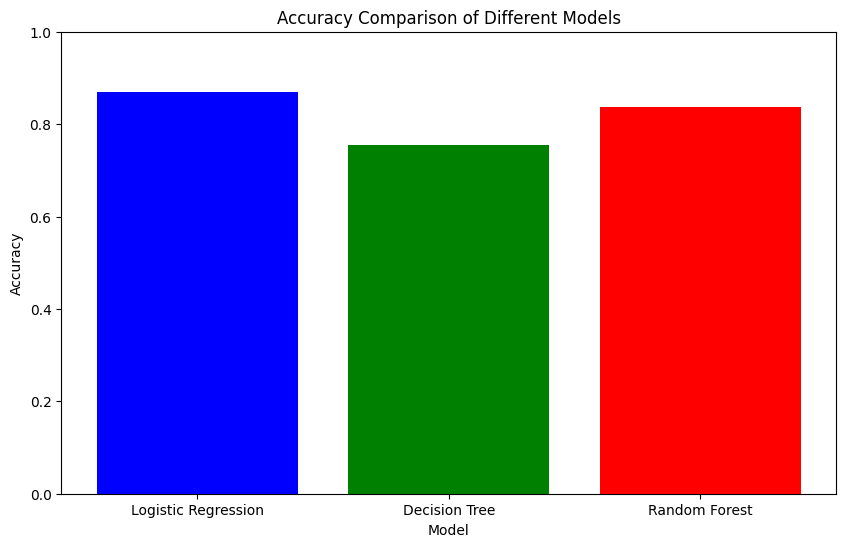

In [21]:
# Accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

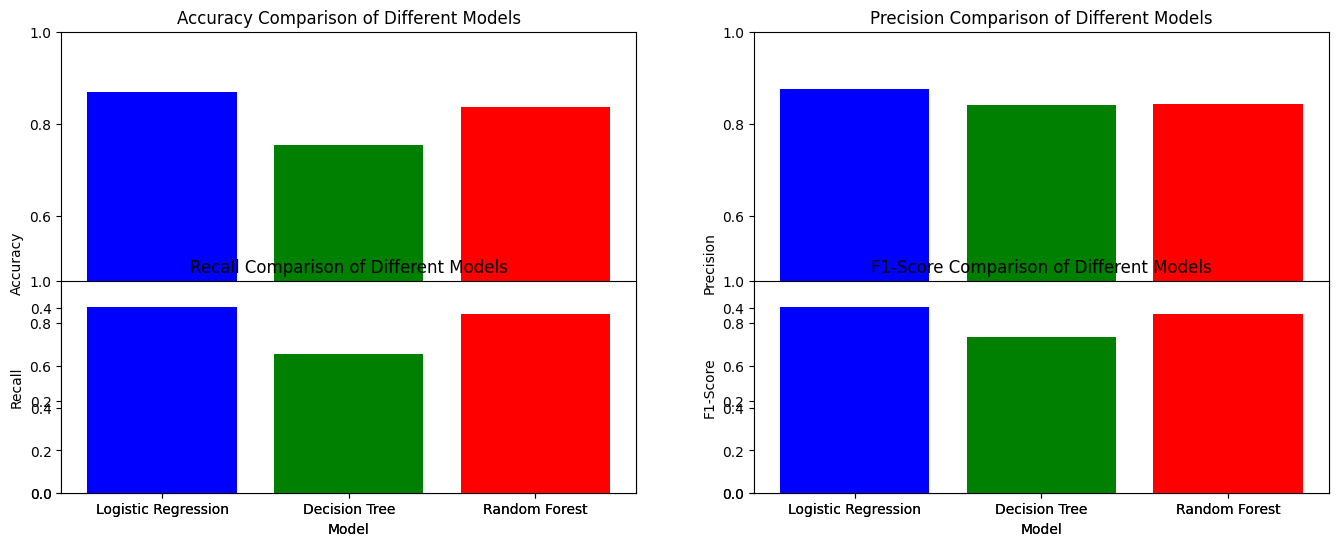

In [25]:
# Accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Precision scores
precision_scores = {
    'Logistic Regression': precision,
    'Decision Tree': precision_dt,
    'Random Forest': precision_rf
}

# Plot the accuracy scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)

# Plot the precision scores
plt.subplot(1, 2, 2)
plt.bar(precision_scores.keys(), precision_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Different Models')
plt.ylim(0, 1)

# Recall scores
recall_scores = {
    'Logistic Regression': recall,
    'Decision Tree': recall_dt,
    'Random Forest': recall_rf
}

# F1 scores
f1_scores = {
    'Logistic Regression': f1,
    'Decision Tree': f1_dt,
    'Random Forest': f1_rf
}

# Plot the recall scores
plt.subplot(2, 2, 3)
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Different Models')
plt.ylim(0, 1)

# Plot the F1 scores
plt.subplot(2, 2, 4)
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Different Models')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.868852    0.87500  0.87500  0.875000
1        Decision Tree  0.754098    0.84000  0.65625  0.736842
2        Random Forest  0.836066    0.84375  0.84375  0.843750

Best Model for Heart Disease Prediction:


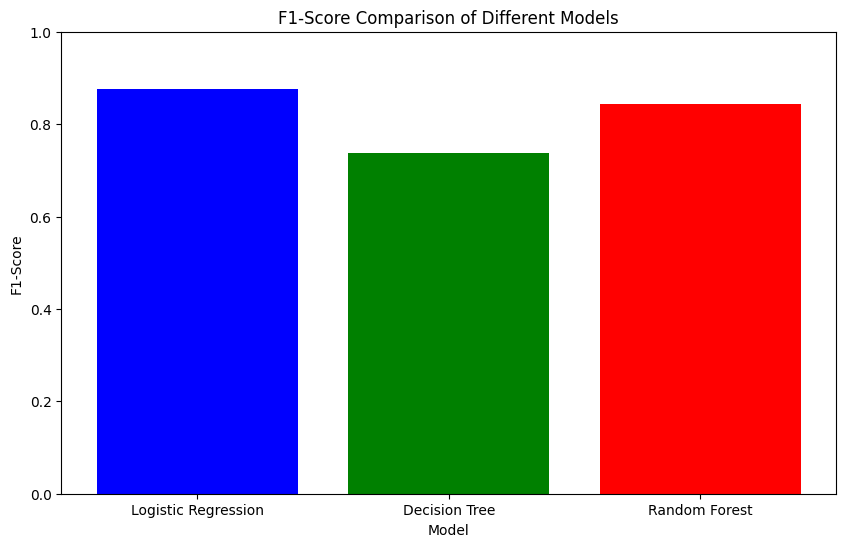

In [24]:
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf]
})

# Display the comparison DataFrame
print(comparison_df)

# Identify the best model based on F1-Score
best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
print("\nBest Model for Heart Disease Prediction:")
# Visualize the best model based on F1-Score
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['F1-Score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

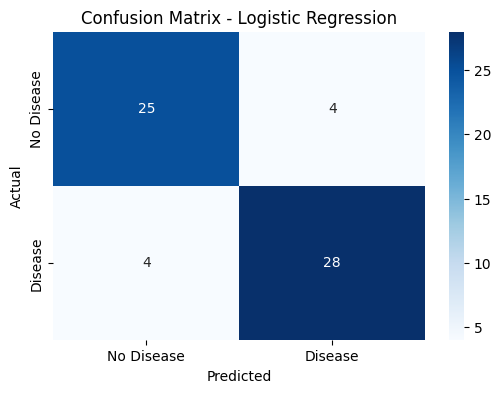

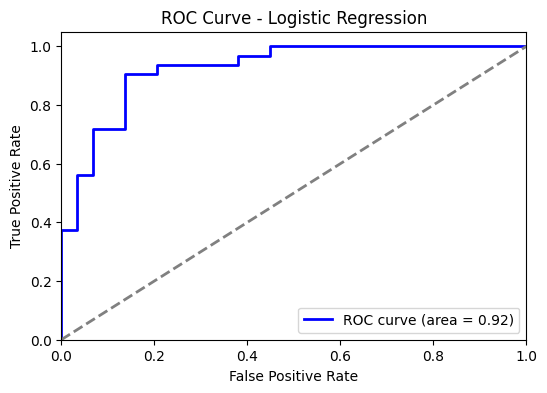

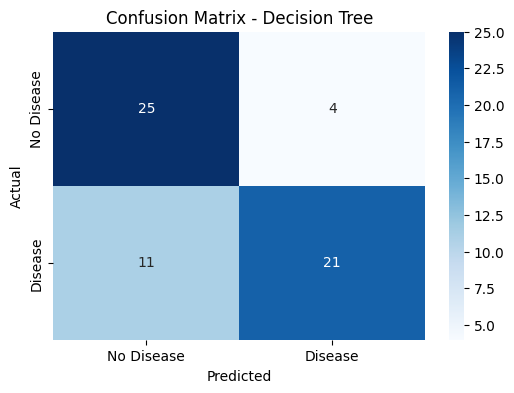

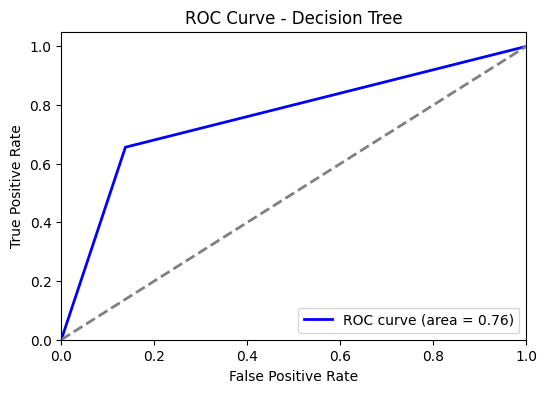

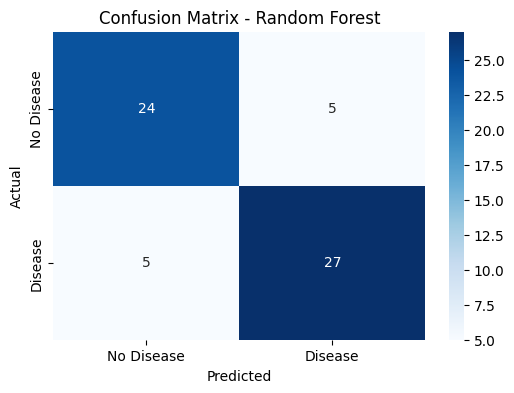

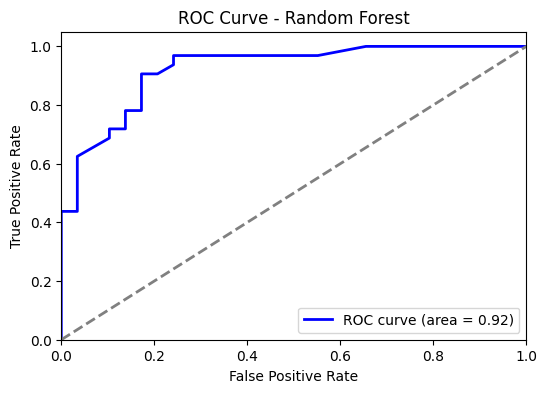

In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - Logistic Regression')
plot_roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], 'ROC Curve - Logistic Regression')

# Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], 'ROC Curve - Decision Tree')

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'ROC Curve - Random Forest')

In [27]:
# Make predictions using the logistic regression model
y_pred_lr = lr_model.predict(X_test)

# Display the predictions
print("Predictions using Logistic Regression:", y_pred_lr)

Predictions using Logistic Regression: [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


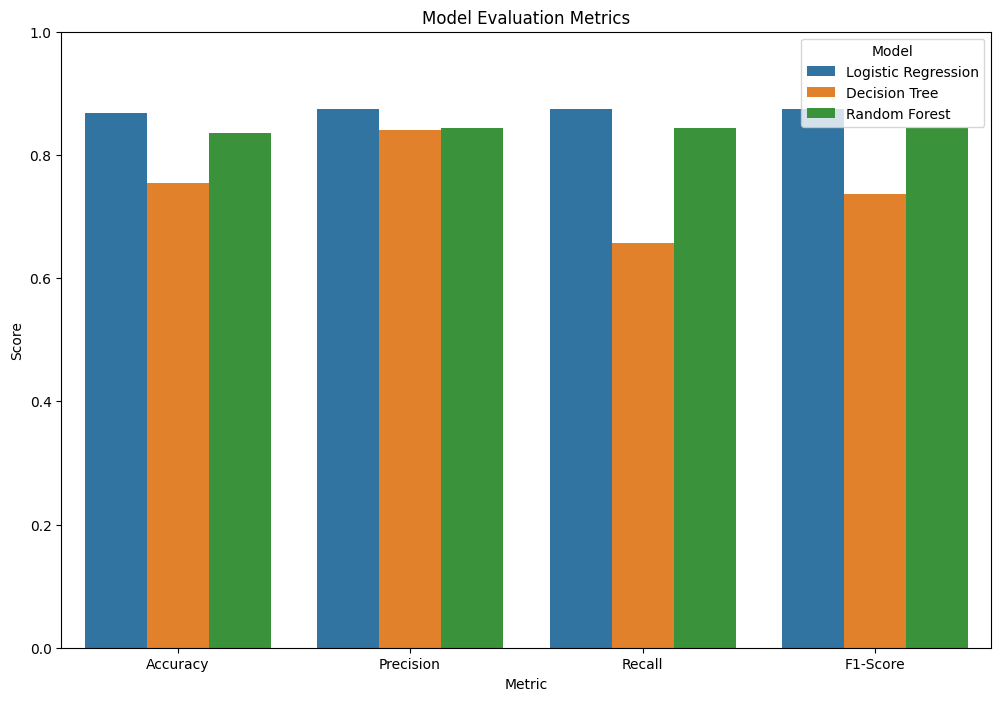

In [28]:
import seaborn as sns

# Create a DataFrame to compare the models
evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf]
})

# Melt the DataFrame for easier plotting with Seaborn
evaluation_melted = evaluation_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=evaluation_melted)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df =pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Ensure X_train is defined
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GridSearchCV for each model
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1')
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')

# Fit GridSearchCV for each model
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for each model
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best F1 score for Logistic Regression:", best_score_lr)

print("Best parameters for Decision Tree:", best_params_dt)
print("Best F1 score for Decision Tree:", best_score_dt)

print("Best parameters for Random Forest:", best_params_rf)
print("Best F1 score for Random Forest:", best_score_rf)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.8413254682401687
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best F1 score for Decision Tree: 0.7880431768667063
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score for Random Forest: 0.8443630189247783


In [9]:
# Ensure lr_model is defined
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions using the logistic regression model
y_pred_lr = lr_model.predict(X_test)

# Display the predictions
print("Predictions using Logistic Regression:", y_pred_lr)

Predictions using Logistic Regression: [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Display the predictions
print("Predictions using Random Forest:", y_pred_rf)

Predictions using Random Forest: [0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Display the predictions
print("Predictions using Decision Tree:", y_pred_dt)

Predictions using Decision Tree: [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
import joblib
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ensure df is defined
df = pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')

# Ensure lr_model, dt_model, and rf_model are defined
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split

# Save the models to disk
model_dir = '/Users/daniyalrosli/fyp/models'
os.makedirs(model_dir, exist_ok=True)

joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(dt_model, os.path.join(model_dir, 'decision_tree_model.pkl'))
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))

print("Models saved successfully.")

Models saved successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


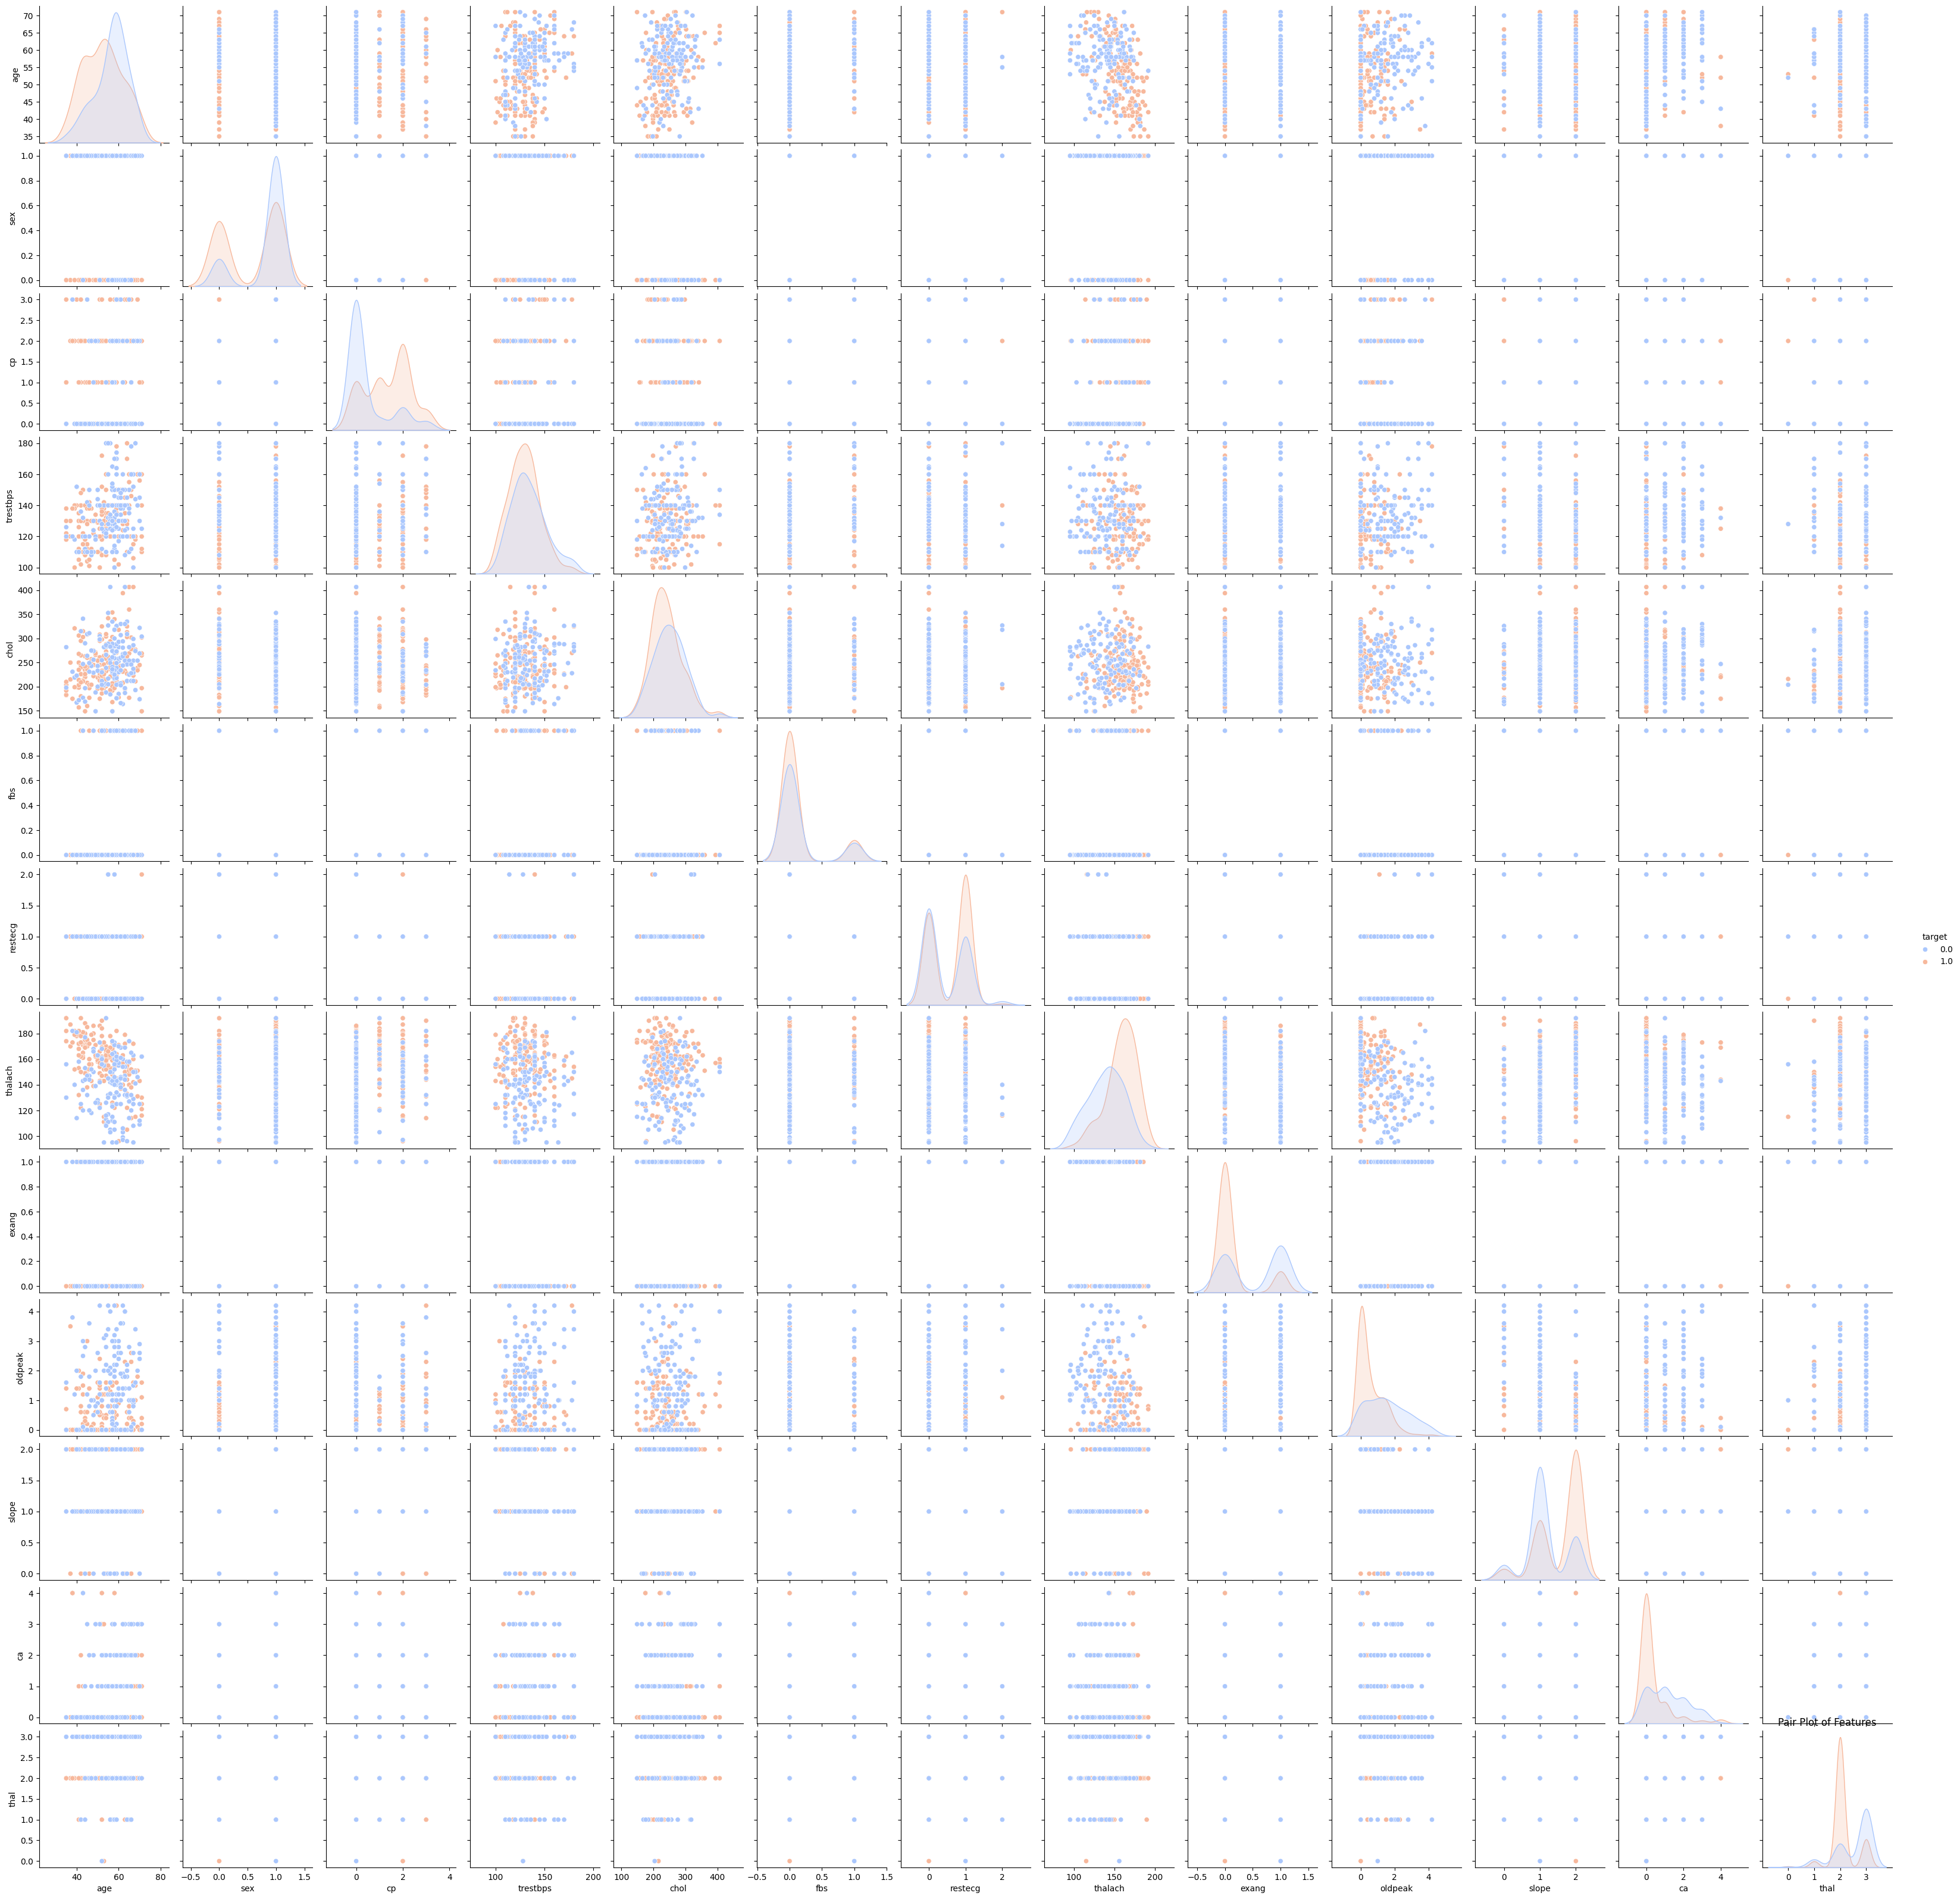

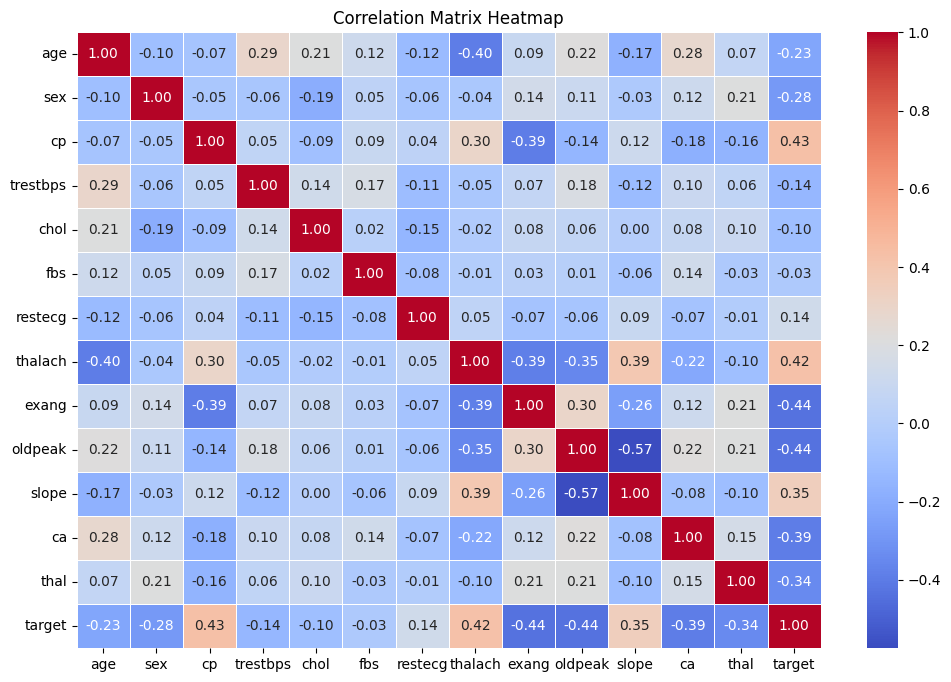

In [13]:
# Pair plot to visualize relationships between features
import seaborn as sns

sns.pairplot(df, diag_kind='kde', hue='target', palette='coolwarm')
plt.title('Pair Plot of Features')
plt.show()
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

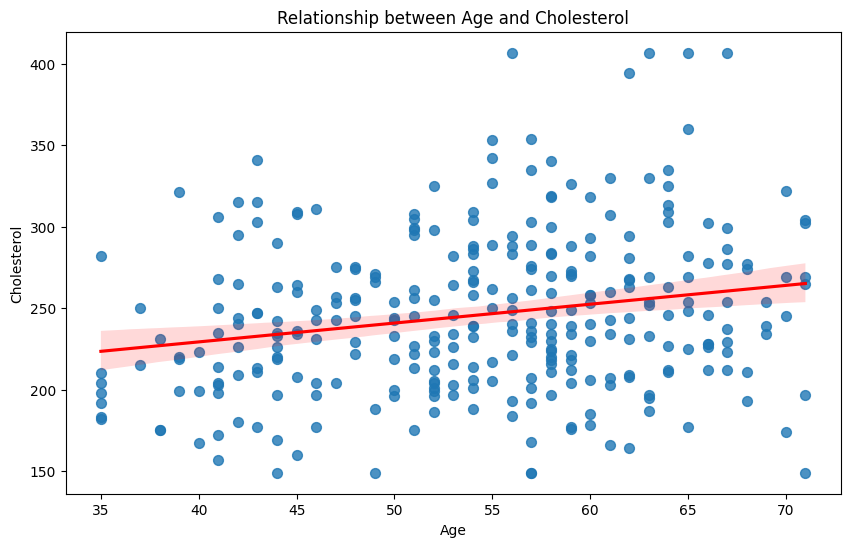

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='chol', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Relationship between Age and Cholesterol')
plt.show()

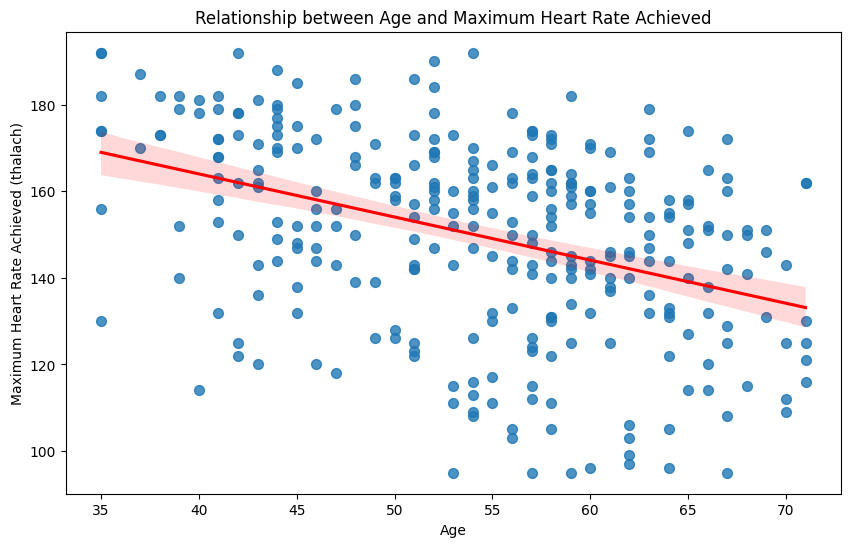

In [15]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.title('Relationship between Age and Maximum Heart Rate Achieved')
plt.show()

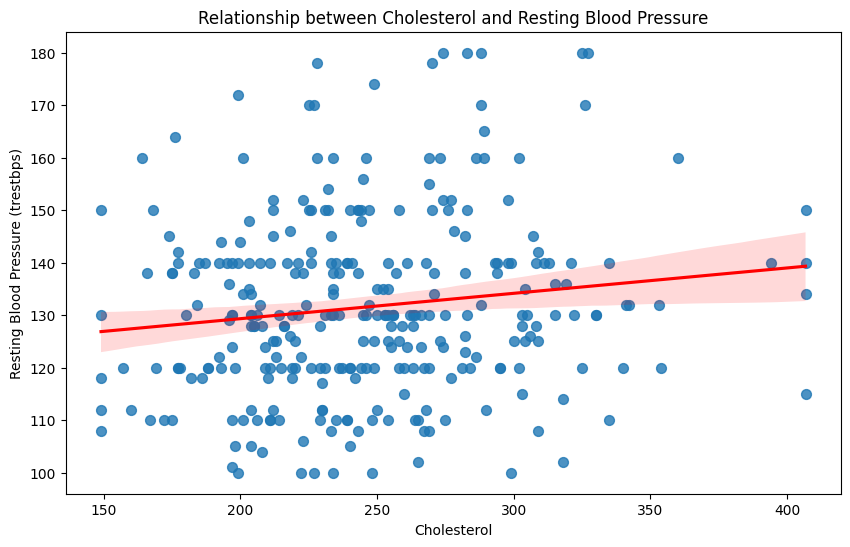

In [16]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='chol', y='trestbps', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Relationship between Cholesterol and Resting Blood Pressure')
plt.show()

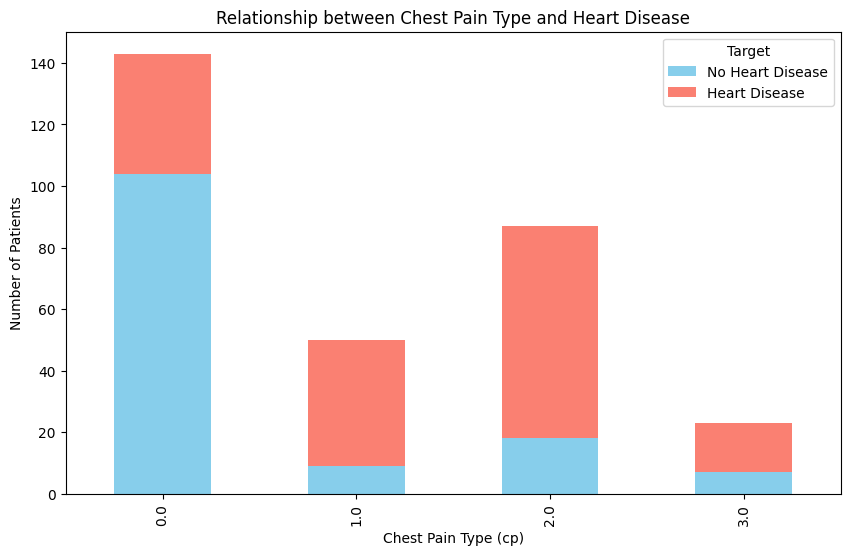

In [19]:
# Count the occurrences of each chest pain type for patients with and without heart disease
cp_vs_target = df.groupby(['cp', 'target']).size().unstack()

# Plot the bar plot
cp_vs_target.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Number of Patients')
plt.title('Relationship between Chest Pain Type and Heart Disease')
plt.legend(['No Heart Disease', 'Heart Disease'], title='Target')
plt.show()